<a href="https://colab.research.google.com/github/anuj031297/Economy_WebScrapping_Data_Analysis/blob/main/FRED_Economic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **FRED Economic Data Analysis**

In [ ]:
!pip install fredapi > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
# pd.set_option('max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key = 'cd634e64edde105640f62783fbca6846'


### **Create the FRED Object**

In [ ]:
fred = Fred(api_key= fred_key)

### **Search For Economic Data**

In [ ]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-23,2023-08-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-23 08:05:06-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-23,2023-08-23,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-23,2023-08-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-23 08:05:11-05:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-08-23,2023-08-23,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,82,Household data are collected as of March. As ...
SP500,SP500,2023-08-23,2023-08-23,S&P 500,2013-08-26,2023-08-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-23 19:10:59-05:00,81,The observations for the S&P 500 represent the...


### **Pull Raw Data**

In [ ]:
fred.get_series(series_id = 'SP500')

2013-08-26    1656.78
2013-08-27    1630.48
2013-08-28    1634.96
2013-08-29    1638.17
2013-08-30    1632.97
               ...   
2023-08-17    4370.36
2023-08-18    4369.71
2023-08-21    4399.77
2023-08-22    4387.55
2023-08-23    4436.01
Length: 2608, dtype: float64

In [ ]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

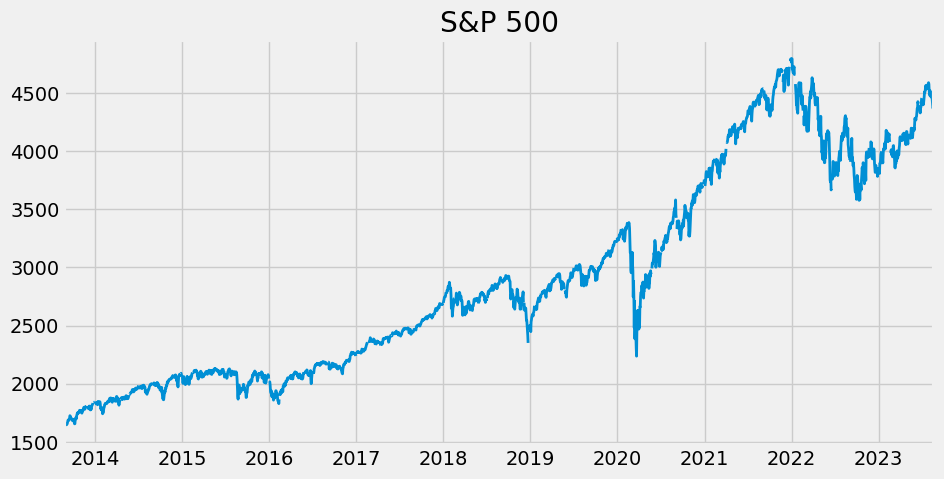

In [ ]:
sp500.plot(figsize = (10, 5), title = 'S&P 500',lw = 2)

### **Pull and Join Multiple Data Series**

In [ ]:
uemp_results = fred.search('unemployment')

In [ ]:
uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-23,2023-08-23,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,92,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-08-23,2023-08-23,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 07:45:34-05:00,52,The unemployment rate represents the number of...
CCSA,CCSA,2023-08-23,2023-08-23,Continued Claims (Insured Unemployment),1967-01-07,2023-08-05,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-08-17 07:33:03-05:00,72,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-08-23,2023-08-23,Continued Claims (Insured Unemployment),1967-01-07,2023-08-05,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-08-17 07:33:03-05:00,38,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-08-23,2023-08-23,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,63,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNRATERH,UNRATERH,2023-08-23,2023-08-23,FOMC Summary of Economic Projections for the C...,2023-01-01,2025-01-01,Annual,A,"Fourth Quarter, Percent","Fourth Qtr., %",Not Seasonally Adjusted,NSA,2023-06-14 14:08:07-05:00,5,Projections for the unemployment rate are for ...
CGBD25O,CGBD25O,2023-08-23,2023-08-23,Unemployment Rate - College Graduates - Bachel...,2000-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 09:26:02-05:00,5,The unemployment rate represents the number un...
LASRD880000000000004,LASRD880000000000004,2023-08-23,2023-08-23,Unemployed Persons in Mountain Census Division,1976-01-01,2023-06-01,Monthly,M,Persons,Persons,Seasonally Adjusted,SA,2023-08-02 10:08:26-05:00,3,These data come from the Current Population Su...


In [ ]:
unrate = fred.get_series('UNRATE')

<Axes: title={'center': 'unemployment rate'}>

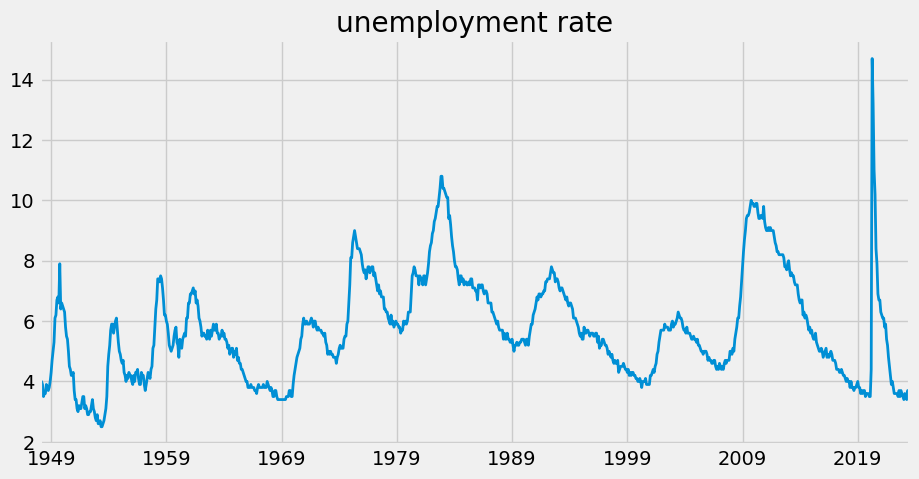

In [ ]:
unrate.plot(figsize = (10, 5), title = 'unemployment rate',lw = 2)

### **Filtering Out Not necessary data**

In [ ]:
unemp_df = fred.search('unemployment rate state', filter =('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
uemp_results = pd.concat(all_results, axis=1)

In [ ]:
#Each item stored in list has their dataframe
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [ ]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
#Plot states unemployment rate
px.line(uemp_states)

### **Pull May 2020 Unemployment Rate Per State**

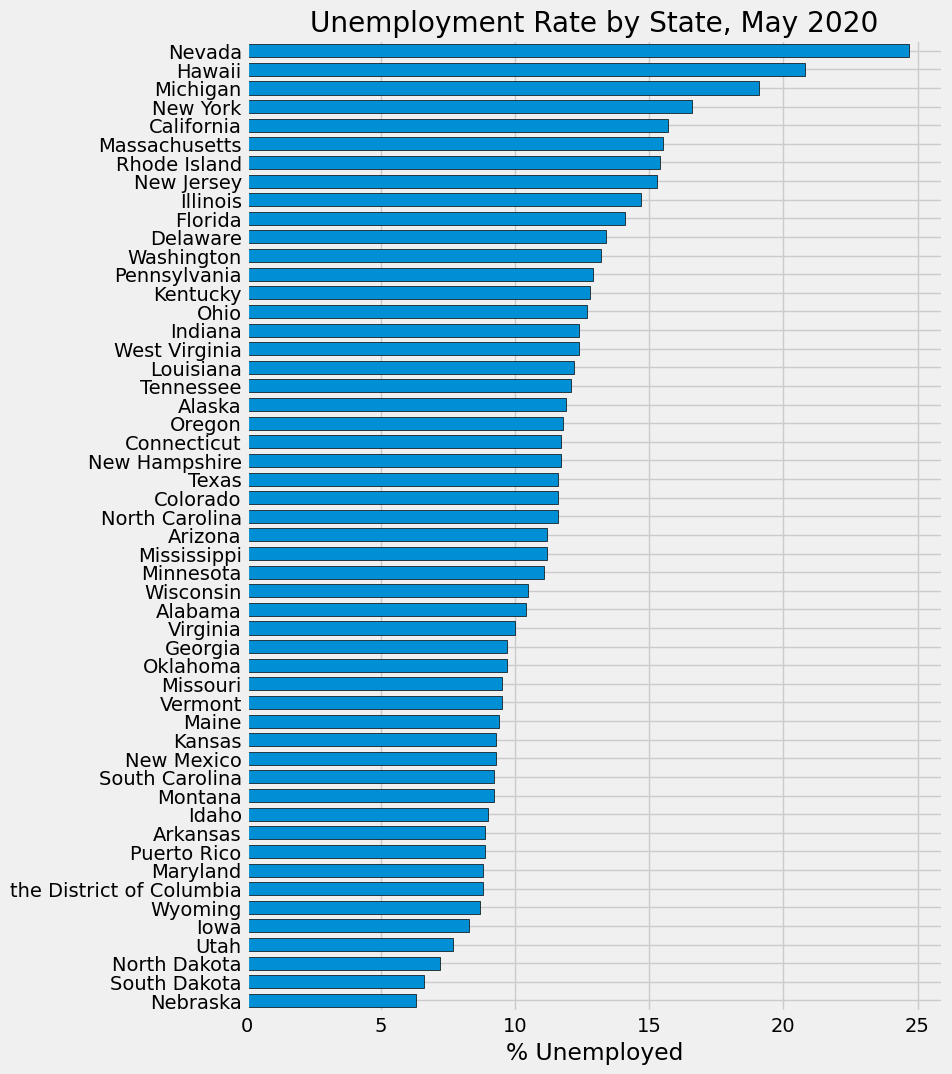

In [ ]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

### **Pull Participation Rate**

In [ ]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

## Plot Unemployment vs Participation for each state!

In [ ]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

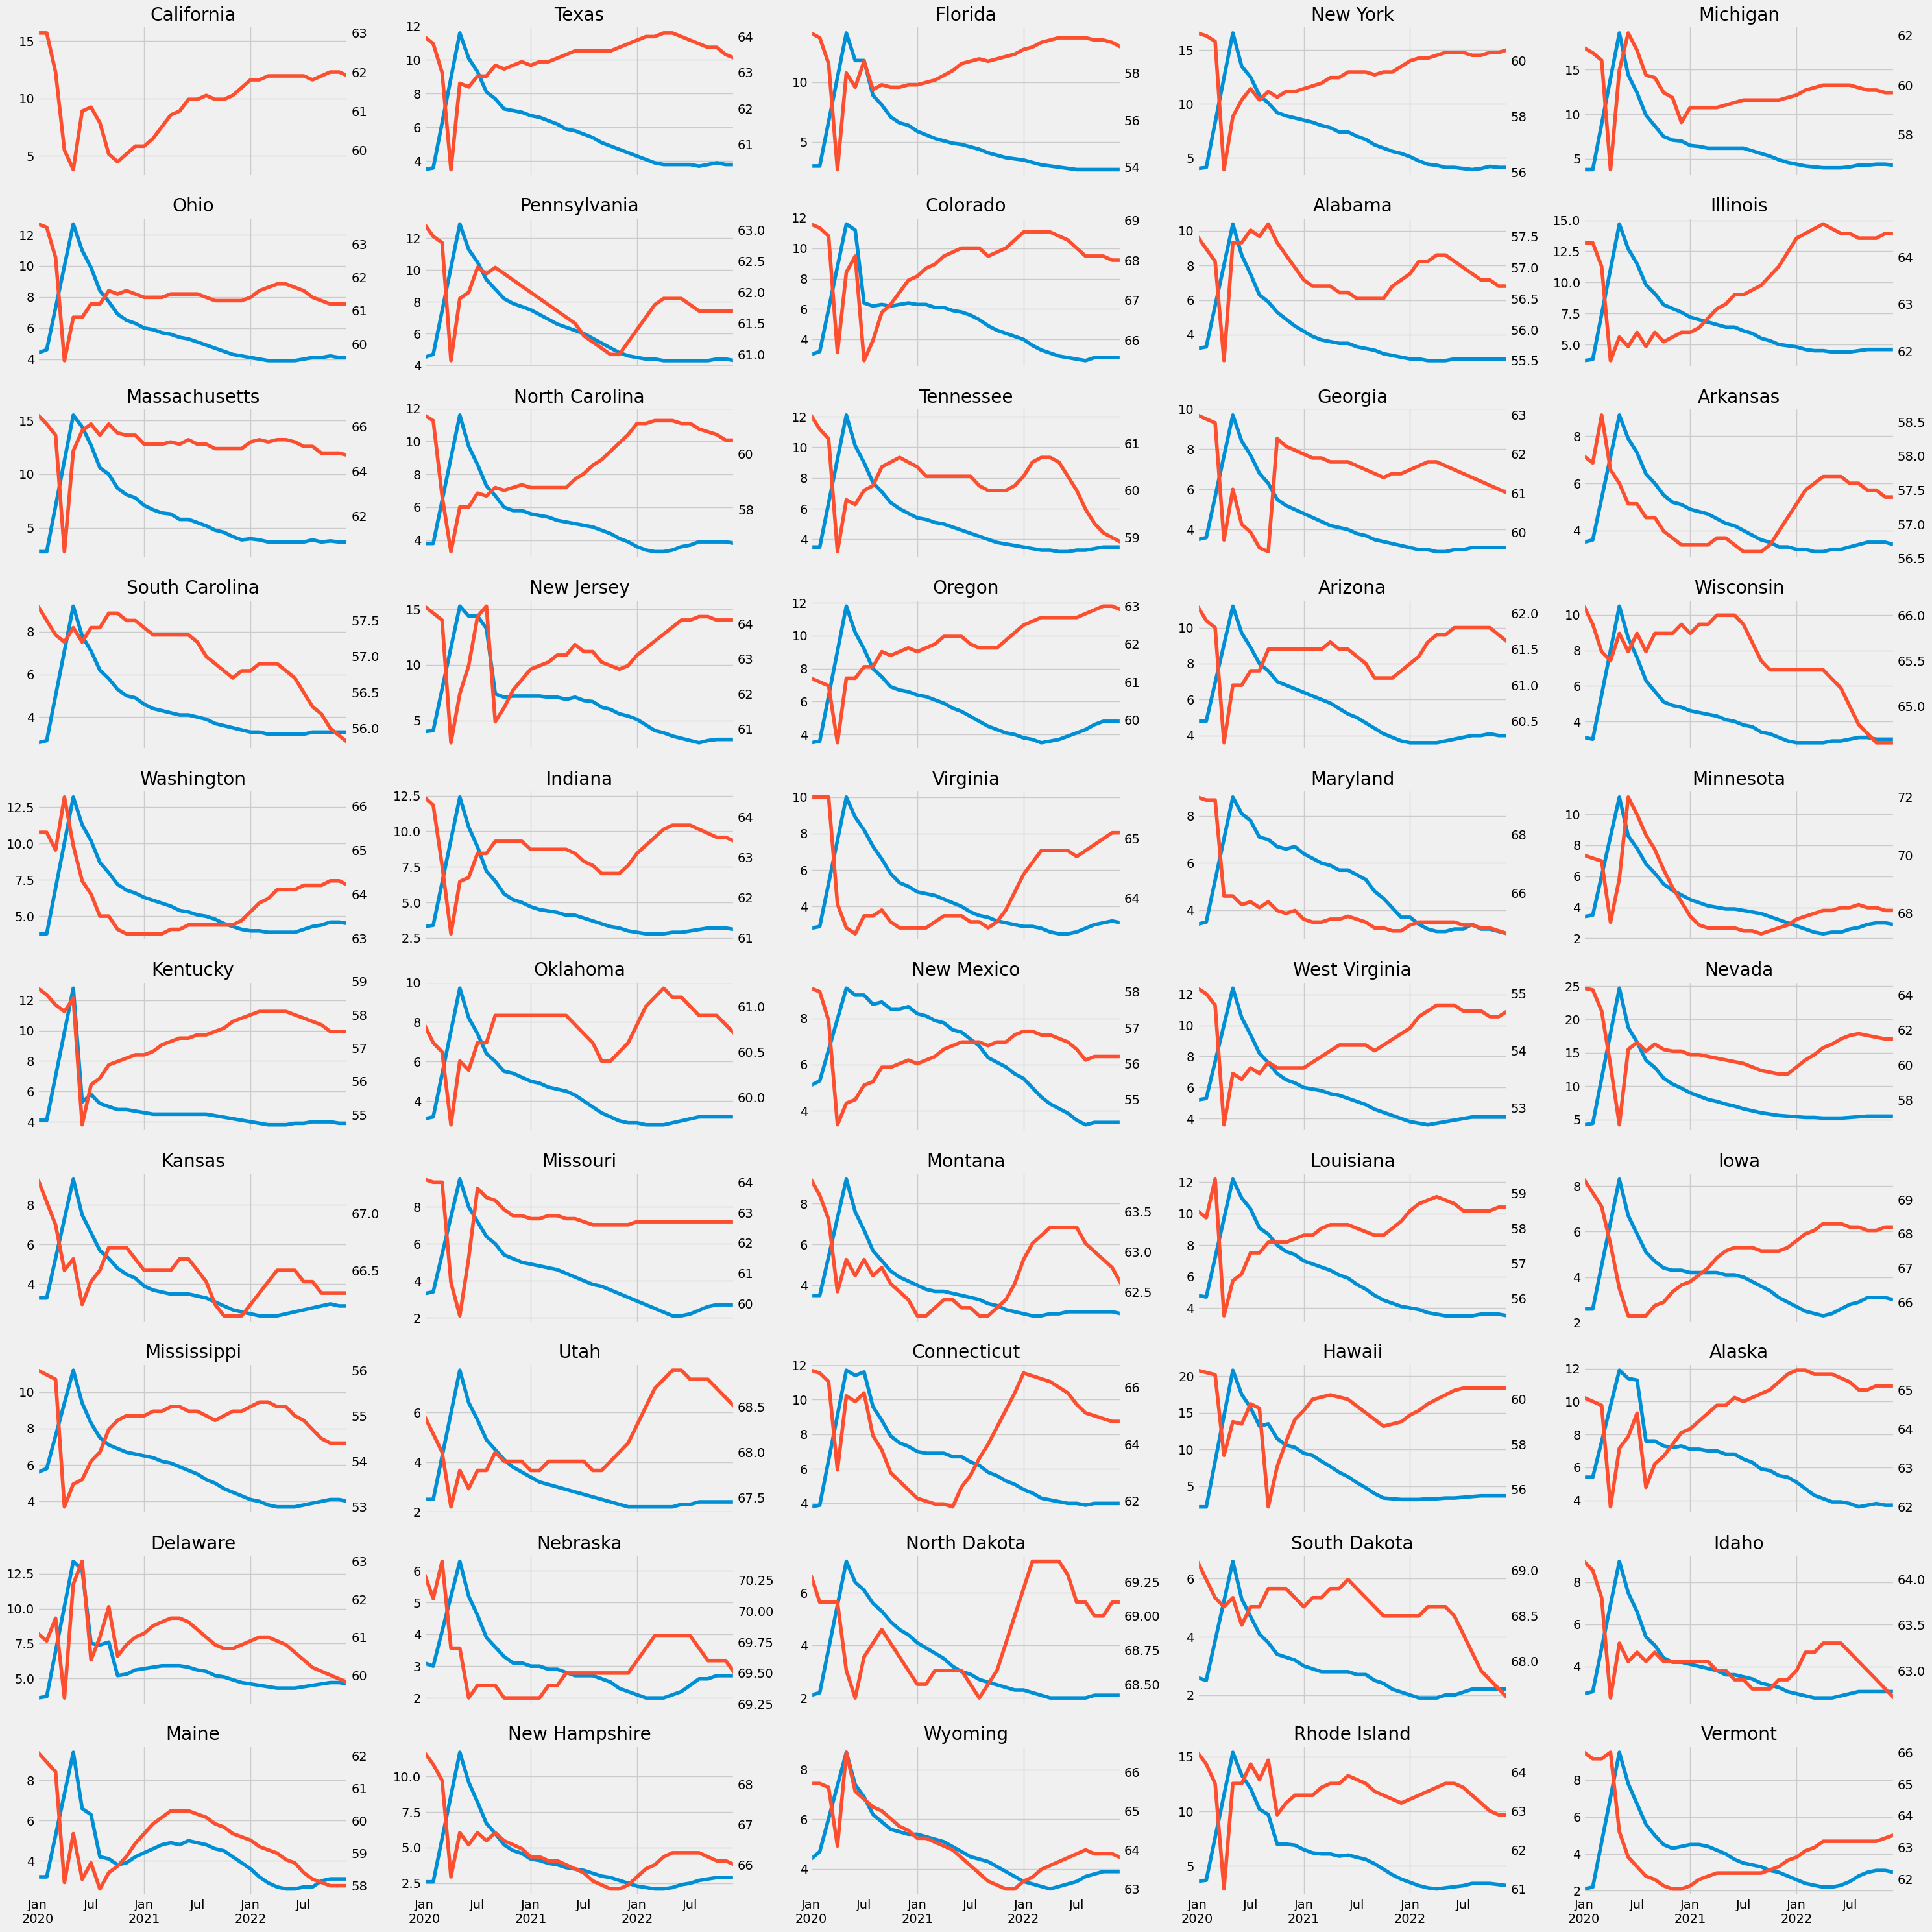

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2023')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2023')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

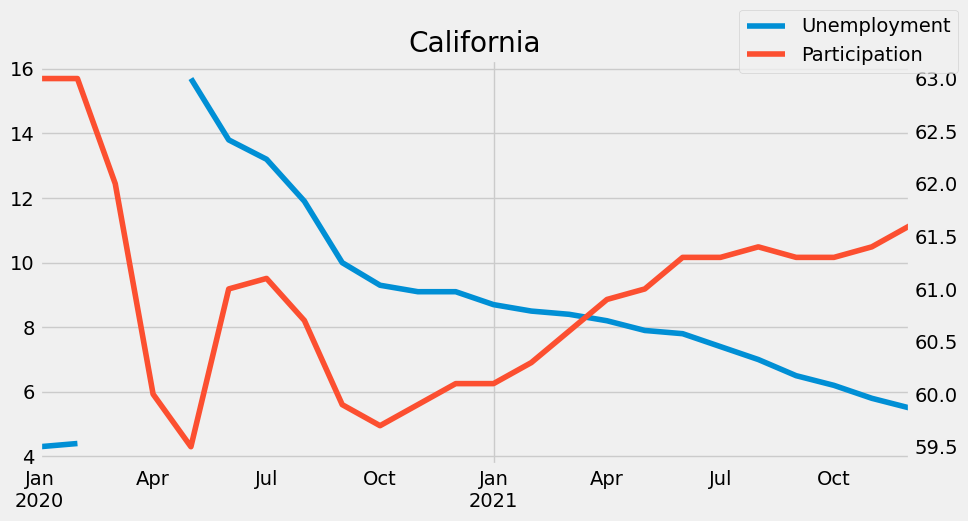

In [ ]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()